# Pre TP1

In [2]:
from clustimage import Clustimage
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import numpy as np

## Importamos las imágenes

A partir del siguiente link, se obtendrán las imágenes a color de 210 flores pertenecientes a 10 especies diferentes. Cada imagen consiste en un archivo .PNG de 128 pixeles de ancho por 128 pixeles de profundidad (128x128x3). Adicionlamente, se encuentra el archivo .CSV con las etiquetas (labels) que corresponden a la especie de cada imagen.

In [3]:
image_path = "flower_images" #PONER EL PATH DE CADA UNO

path = sorted([os.path.join(image_path, file)
               for file in os.listdir(image_path )
               if file.endswith('.png')])

In [4]:
labels = pd.read_csv('flower_images/flower_labels.csv')

In [5]:
labels[labels['label']==0].iloc[0,0]

'0001.png'

## Preprocesamiento de los datos
Cargar el dataset y sus respectivas etiquetas. Es importante asegurarse que las imágenes sean comparables en color, valor, rango y tamaño.

Explorar y graficar los subconjuntos de imágenes que representan flores de la misma especie

(128, 128, 3)


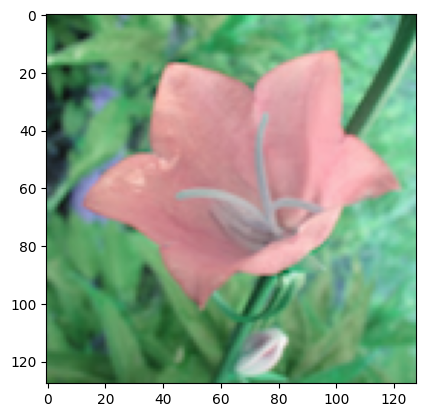

In [7]:
img = cv2.imread('flower_images/'+labels[labels['label']==5].iloc[10,0])
print(img.shape)

plt.imshow(img)

Label:  0


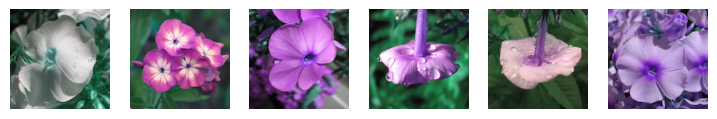

Label:  1


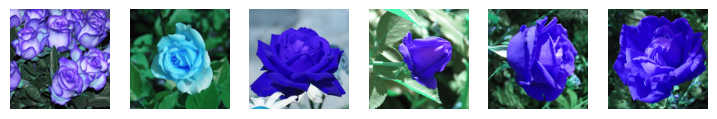

Label:  2


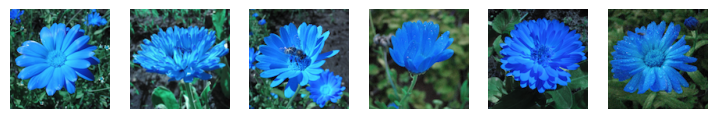

Label:  3


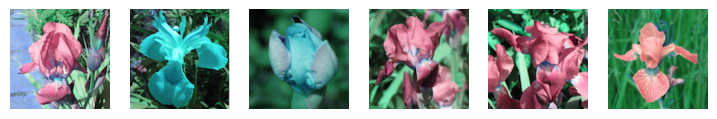

Label:  4


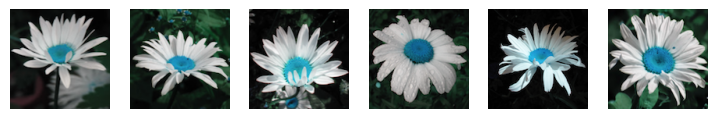

In [91]:
def print_flowers(species:list,n:int):
    for label in species:
        print("Label: ", label)
        photos = labels[labels['label'] == label].sample(n)
        fig, axs = plt.subplots(1, n, figsize=(n*3/2, n*2))
        for i in range(n):            
            axs[i].imshow(cv2.imread('flower_images/'+photos.iloc[i]['file']))
            axs[i].axis('off')
        plt.show()
print_flowers(range(5),6)

## Manipulación de datos

Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.

(-0.5, 127.5, 127.5, -0.5)

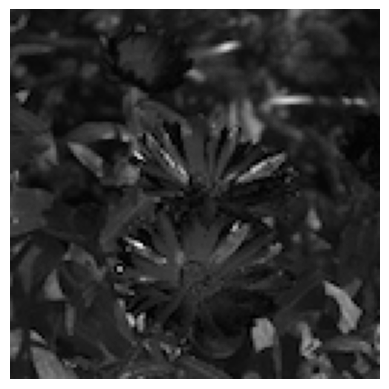

In [189]:
random.seed(42)
imagen = "flower_images/"+random.choice(labels['file'])
plt.imshow(cv2.imread(imagen)[:,:,0],cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'Brillo alto')

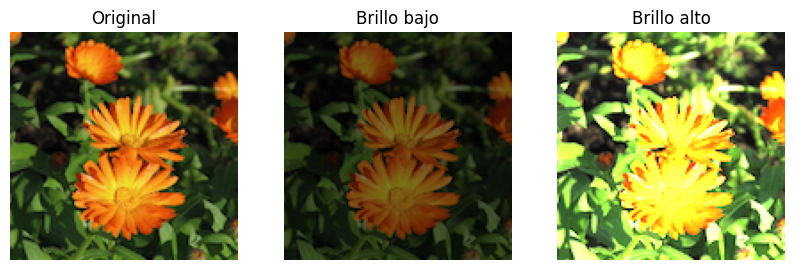

In [215]:
random.seed(42)
imagen = "flower_images/"+random.choice(labels['file'])
imagen = cv2.imread(imagen)

fig, axs = plt.subplots(1, 3, figsize=(10, 20))

imagen_original = np.clip(imagen , 0, 255).astype(np.uint8)
axs[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title("Original")

imagen_oscura = np.clip(imagen * 0.5, 0, 255).astype(np.uint8)
axs[1].imshow(cv2.cvtColor(imagen_oscura, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title("Brillo bajo")

imagen_clara = np.clip(imagen * 2.5, 0, 255).astype(np.uint8)
axs[2].imshow(cv2.cvtColor(imagen_clara, cv2.COLOR_BGR2RGB))
axs[2].axis('off')
axs[2].set_title("Brillo alto")

Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? Si existen otras transformaciones mostrar más de una conversión.


Recortar una parte significativa de la imagen, quedándose sólo con el círculo central de la misma.

(-0.5, 27.5, 27.5, -0.5)

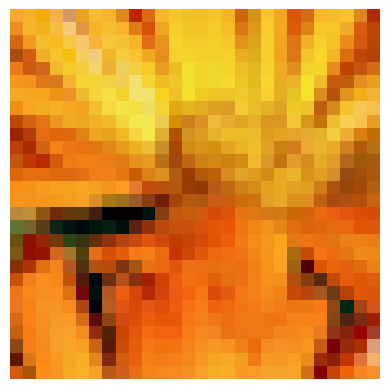

In [212]:
random.seed(42)
imagen = "flower_images/"+random.choice(labels['file'])
imagen = cv2.imread(imagen)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)[50:78,50:78,:])
#plt.imshow(imagen[50:78,50:78,:])
plt.axis('off')

flower_images/0164.png


(-0.5, 127.5, 127.5, -0.5)

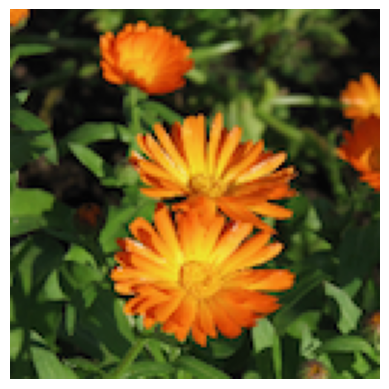

In [209]:
random.seed(42)
imagen = "flower_images/"+random.choice(labels['file'])
print(imagen)
imagen = cv2.imread(imagen)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

Generar dos imágenes random: una imagen mezclando los pixels y otra mezclando partes de diferentes imágenes.

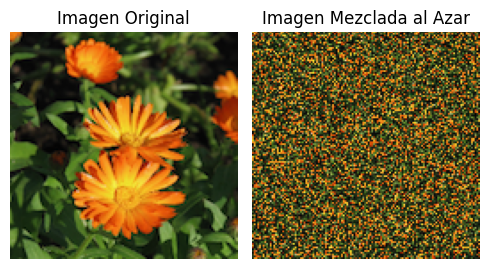

In [216]:
# Establecer la semilla aleatoria
random.seed(42)
# Seleccionar una imagen al azar
imagen_path = "flower_images/" + random.choice(labels['file'])
# Leer la imagen usando OpenCV
imagen = cv2.imread(imagen_path)
# Obtener las dimensiones de la imagen
alto, ancho, canales = imagen.shape
# Mezclar los índices de los píxeles al azar
indices_aleatorios = list(range(alto * ancho))
random.shuffle(indices_aleatorios)
# Reorganizar los píxeles de la imagen utilizando los índices mezclados
imagen_mezclada = imagen.reshape(-1, canales)[indices_aleatorios].reshape(alto, ancho, canales)
# Crear una figura para mostrar la imagen original y la mezclada
plt.figure(figsize=(5, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen mezclada
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_mezclada, cv2.COLOR_BGR2RGB))
plt.title('Imagen Mezclada al Azar')
plt.axis('off')

# Ajustar el diseño de los subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

Aplicar dos tipos diferentes de filtros sobre una imagen, explique en qué casos conviene usar cada uno.

Calcular imagen promedio global y el promedio entre las distintas especies. ¿Se pueden distinguir los promedios? ¿Cómo quedan los promedios si consideran las imágenes en blanco y negro?